Iteration 1: Modularity = 0.0762
([0, 3, 4, 5, 6, 7, 8, 9], [1, 2])


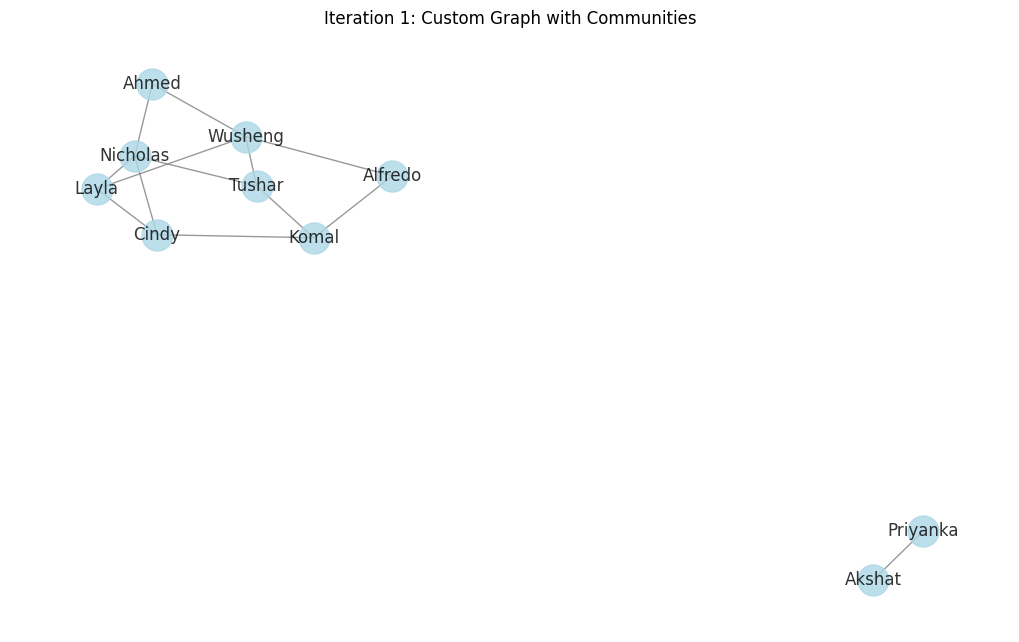

Iteration 2: Modularity = 0.0488
([0, 3, 5, 6, 7, 8, 9], [1, 2], [4])


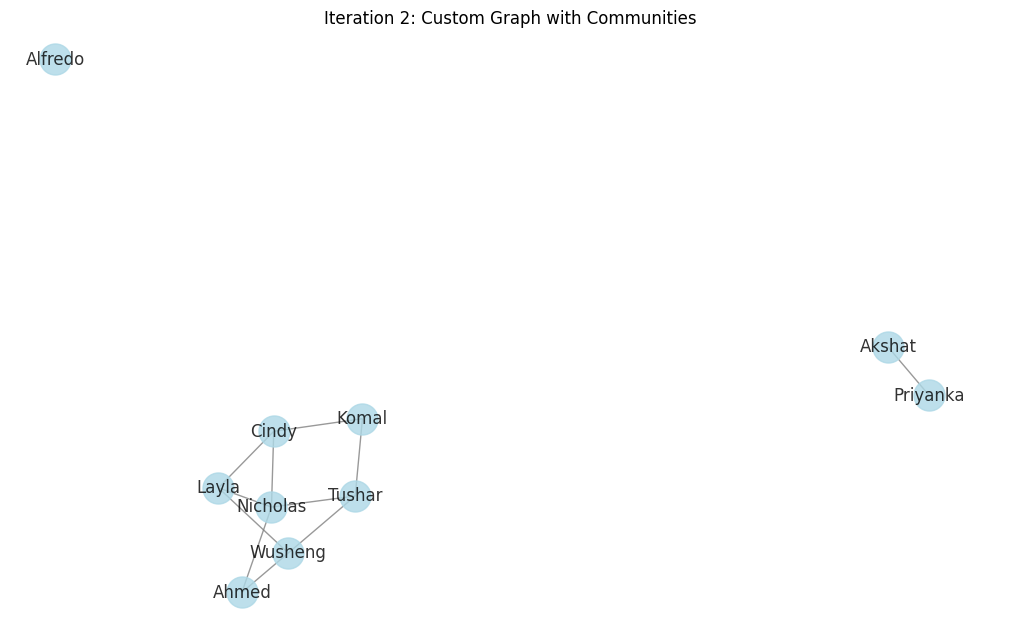

Iteration 3: Modularity = 0.0137
([0, 3, 5, 6, 7, 9], [1, 2], [4], [8])


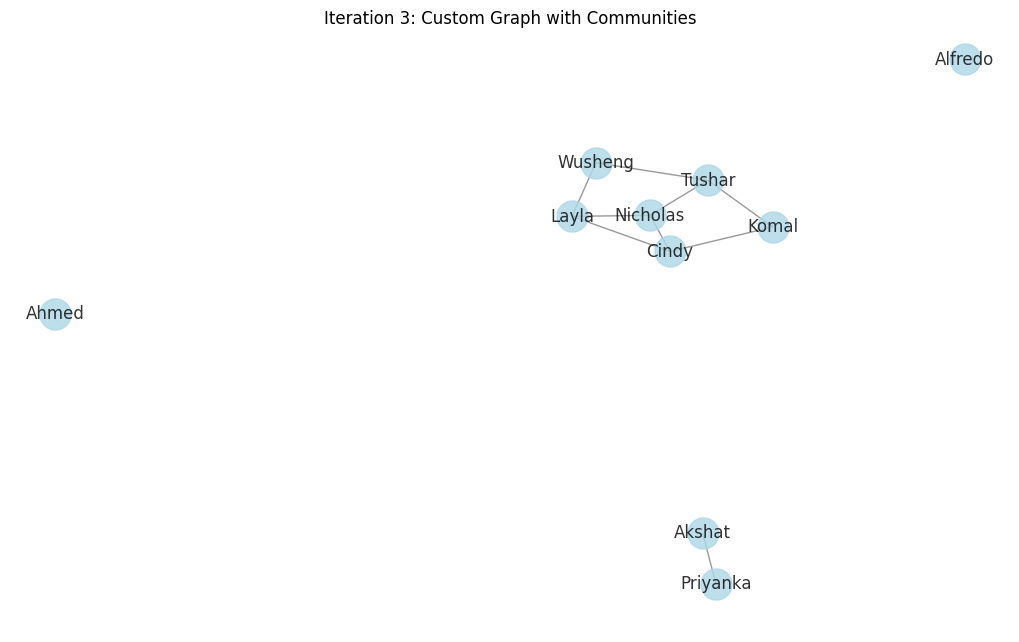

Iteration 4: Modularity = 0.0059
([0, 5, 6, 7, 9], [1, 2], [3], [4], [8])


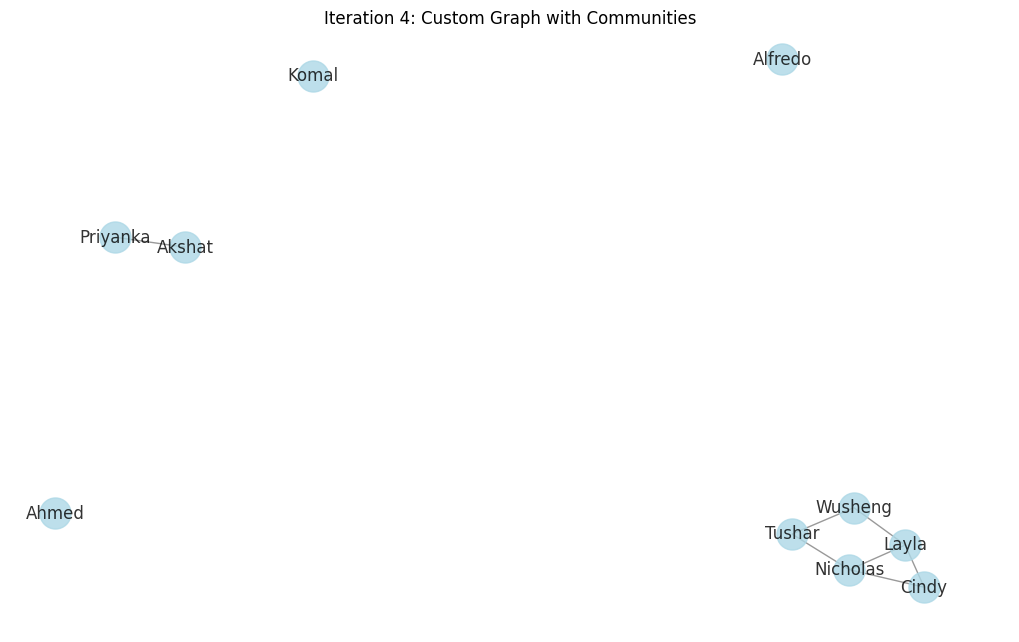

Iteration 5: Modularity = 0.0684
([0, 7], [1, 2], [3], [4], [5, 6, 9], [8])


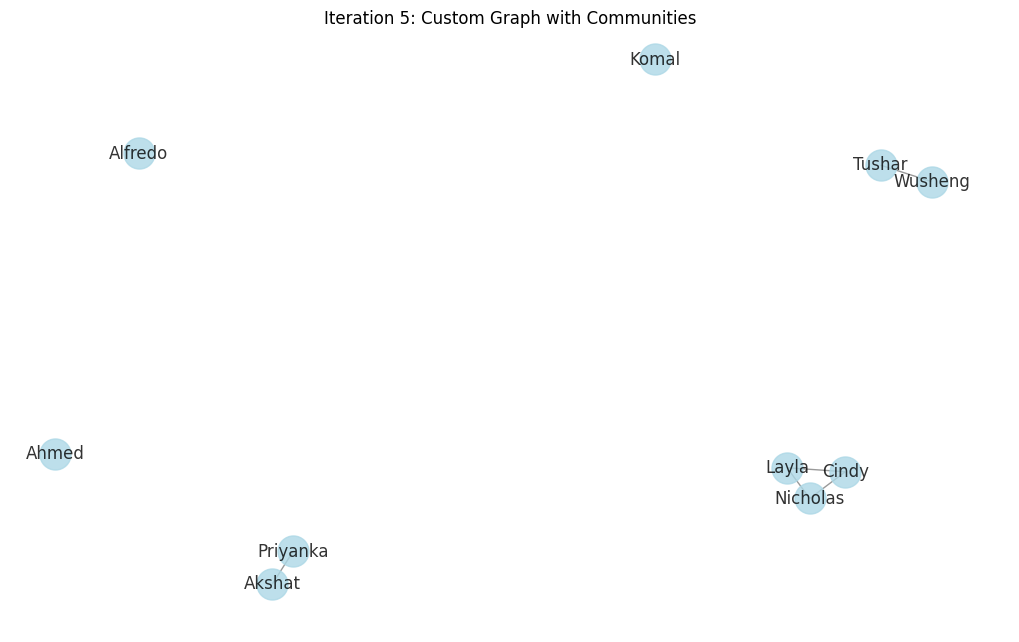

Iteration 6: Modularity = 0.0352
([0], [1, 2], [3], [4], [5, 6, 9], [7], [8])


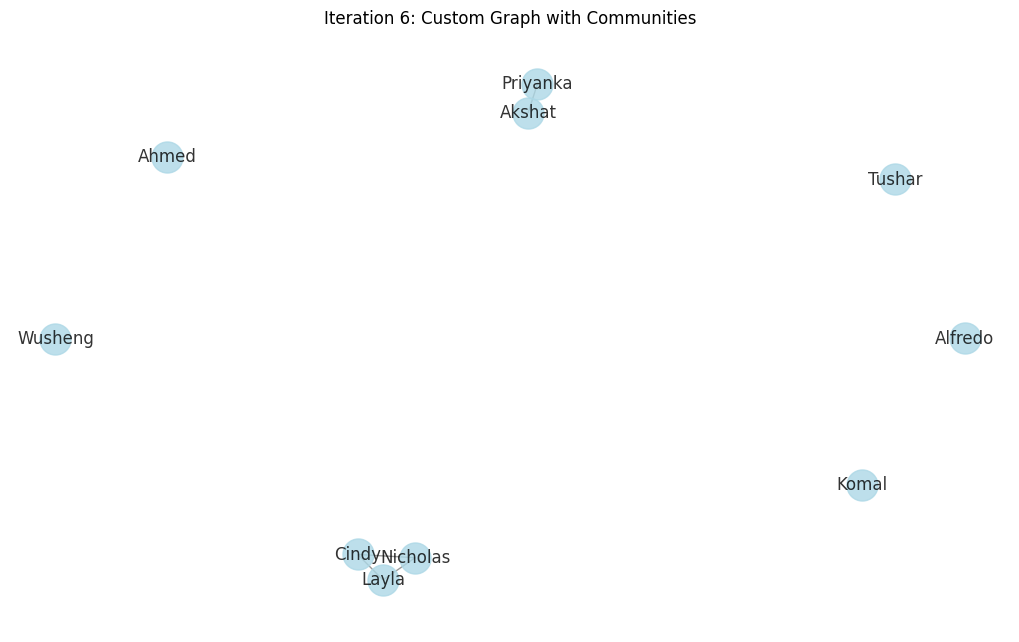

Iteration 7: Modularity = -0.0156
([0], [1], [2], [3], [4], [5, 6, 9], [7], [8])


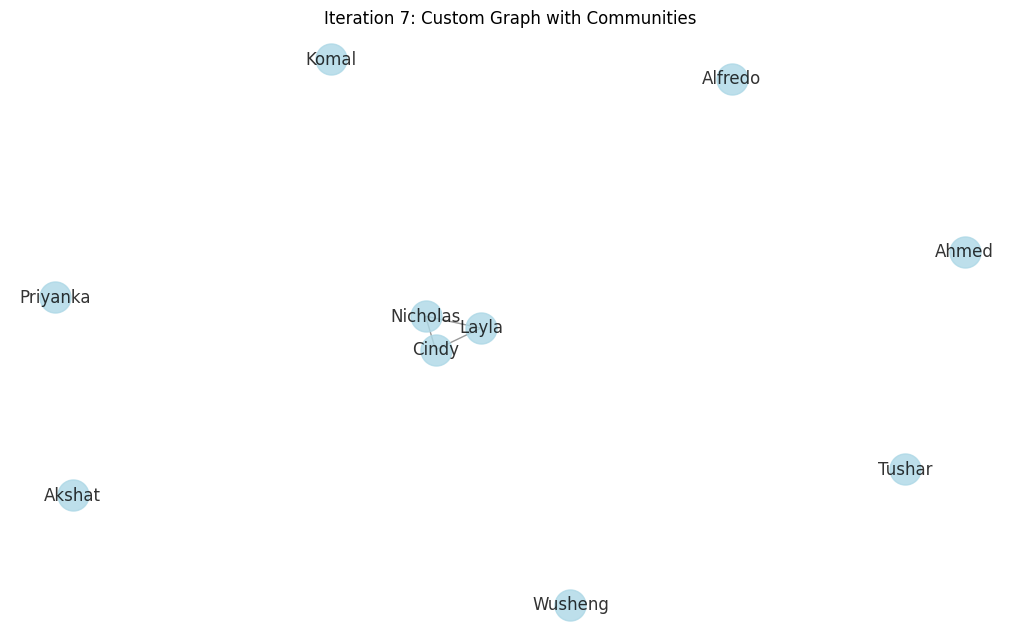

Iteration 8: Modularity = -0.0781
([0], [1], [2], [3], [4], [5], [6, 9], [7], [8])


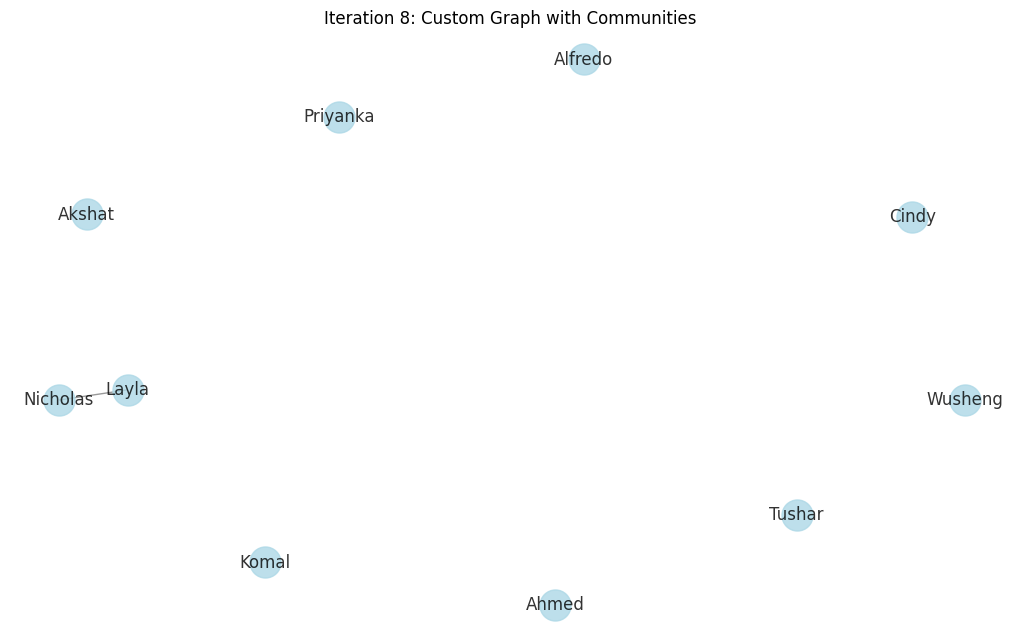

Iteration 9: Modularity = -0.1113
([0], [1], [2], [3], [4], [5], [6], [7], [8], [9])


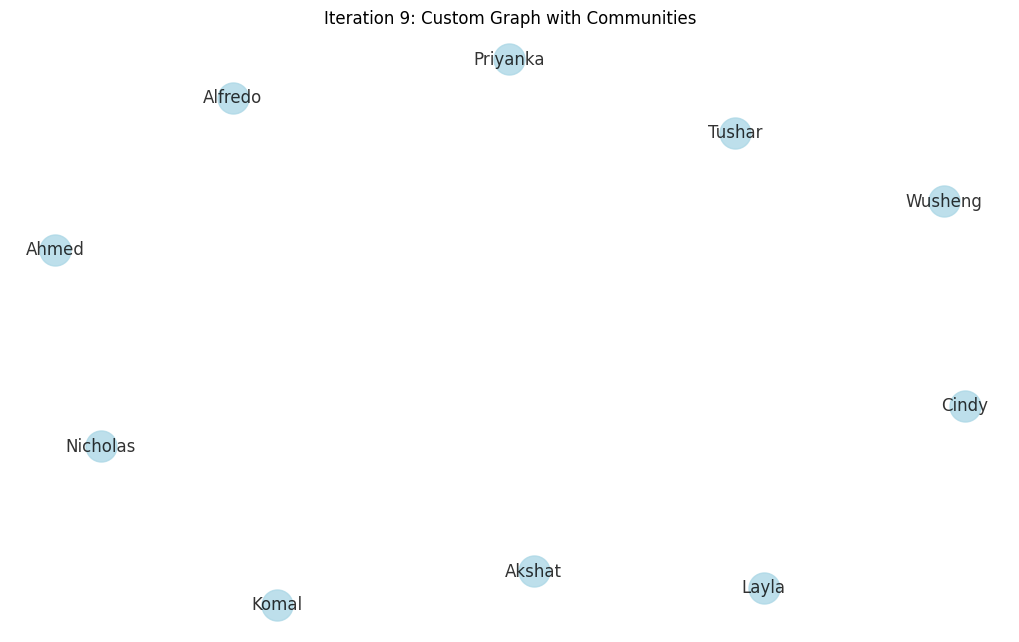

In [8]:
#Qn 3 Girvan Newman
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Create adjacency matrix for the custom graph
adj_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
])

G_custom = nx.from_numpy_array(adj_matrix)

# Assign human-readable names to the nodes
node_names = {
    0: 'Tushar',
    1: 'Priyanka',
    2: 'Akshat',
    3: 'Komal',
    4: 'Alfredo',
    5: 'Cindy',
    6: 'Layla',
    7: 'Wusheng',
    8: 'Ahmed',
    9: 'Nicholas'
}

nx.set_node_attributes(G_custom, node_names, 'name')

# Compute initial edge betweenness for custom graph
eb_custom = nx.edge_betweenness_centrality(G_custom)

# Find communities using Girvan-Newman algorithm for custom graph
comp_custom = nx.community.girvan_newman(G_custom)

# Calculate modularity for each split and choose stopping point
threshold_modularity = 0.3  # Set your desired modularity threshold
for i, communities in enumerate(comp_custom):
    modularity = nx.community.modularity(G_custom, communities)
    
    print(f"Iteration {i + 1}: Modularity = {modularity:.4f}")
    print(tuple(sorted(c) for c in communities))
    
    # Create graph with communities for visualization
    G_communities = G_custom.copy()
    for edge in G_custom.edges():
        for comm in communities:
            if edge[0] in comm and edge[1] in comm:
                break
        else:
            G_communities.remove_edge(*edge)
    
    # Plot graph with communities
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G_communities)
    labels = nx.get_node_attributes(G_communities, 'name')
    nx.draw(G_communities, pos, labels=labels, with_labels=True, node_color='lightblue', edge_color='gray', width=1, edge_cmap=plt.cm.Blues, node_size=500, alpha=0.8)
    plt.title(f"Iteration {i + 1}: Custom Graph with Communities")
    plt.show()
    
    if modularity >= threshold_modularity:
        print(f"Stopping at iteration {i + 1} as modularity {modularity:.4f} exceeds threshold {threshold_modularity}.")
        break


In [6]:
#Qn 2 k cliques
import networkx as nx
import numpy as np
import itertools

def find_maximal_k_cliques(adj_matrix):
    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    # Get the number of nodes in the graph
    num_nodes = len(G.nodes())
    
    # Initialize dictionary to store maximal k-cliques
    maximal_k_cliques_dict = {}
    
    # Iterate over all possible k values
    for k in range(1, 6):  # k starts from 1 and goes up to 5
        # Initialize list to store maximal k-cliques for current k
        maximal_k_cliques_dict[k] = []
        
        # Iterate over all combinations of nodes of size k or less
        for size in range(1, num_nodes + 1):
            for nodes in itertools.combinations(G.nodes(), size):
                # Check if the subgraph induced by nodes forms a k-clique
                subgraph = G.subgraph(nodes)
                
                # Check if the subgraph is connected
                if nx.is_connected(subgraph):
                    # Check shortest path length between all pairs of nodes
                    is_maximal_k_clique = True
                    for node1 in nodes:
                        for node2 in nodes:
                            if node1 != node2:
                                shortest_path_length = nx.shortest_path_length(subgraph, node1, node2)
                                if shortest_path_length > k:
                                    is_maximal_k_clique = False
                                    break
                        if not is_maximal_k_clique:
                            break
                    
                    if is_maximal_k_clique:
                        maximal_k_cliques_dict[k].append(list(nodes))
    
    return maximal_k_cliques_dict

# Provided adjacency matrix
adj_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
])

# Find maximal k-cliques
maximal_k_cliques_dict = find_maximal_k_cliques(adj_matrix)

# Print maximal k-cliques
for k, cliques in maximal_k_cliques_dict.items():
    print(f"Maximal {k}-cliques:")
    for clique in cliques:
        print(clique)
    print()


Maximal 1-cliques:
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 3]
[0, 7]
[0, 9]
[1, 2]
[1, 5]
[1, 7]
[2, 9]
[3, 4]
[3, 5]
[4, 7]
[5, 6]
[5, 9]
[6, 7]
[6, 9]
[7, 8]
[8, 9]
[5, 6, 9]

Maximal 2-cliques:
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 3]
[0, 7]
[0, 9]
[1, 2]
[1, 5]
[1, 7]
[2, 9]
[3, 4]
[3, 5]
[4, 7]
[5, 6]
[5, 9]
[6, 7]
[6, 9]
[7, 8]
[8, 9]
[0, 1, 7]
[0, 2, 9]
[0, 3, 4]
[0, 3, 5]
[0, 3, 7]
[0, 3, 9]
[0, 4, 7]
[0, 5, 9]
[0, 6, 7]
[0, 6, 9]
[0, 7, 8]
[0, 7, 9]
[0, 8, 9]
[1, 2, 5]
[1, 2, 7]
[1, 2, 9]
[1, 3, 5]
[1, 4, 7]
[1, 5, 6]
[1, 5, 7]
[1, 5, 9]
[1, 6, 7]
[1, 7, 8]
[2, 5, 9]
[2, 6, 9]
[2, 8, 9]
[3, 4, 5]
[3, 4, 7]
[3, 5, 6]
[3, 5, 9]
[4, 6, 7]
[4, 7, 8]
[5, 6, 7]
[5, 6, 9]
[5, 8, 9]
[6, 7, 8]
[6, 7, 9]
[6, 8, 9]
[7, 8, 9]
[0, 1, 4, 7]
[0, 1, 6, 7]
[0, 1, 7, 8]
[0, 2, 5, 9]
[0, 2, 6, 9]
[0, 2, 8, 9]
[0, 3, 4, 5]
[0, 3, 4, 7]
[0, 3, 5, 9]
[0, 3, 7, 9]
[0, 4, 6, 7]
[0, 4, 7, 8]
[0, 5, 6, 9]
[0, 5, 8, 9]
[0, 6, 7, 8]
[0, 6, 7, 9]
[0, 6, 8, 9]
[0, 7, 8, 9]
[1, 2, 5, 7]
[1, 2, 5, 

In [8]:
#Qn 3 k plex
import networkx as nx
import numpy as np
import itertools

def find_k_plexes(adj_matrix):
    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    
    # Get the number of nodes in the graph
    num_nodes = len(G.nodes())
    
    # Initialize dictionary to store k-plexes
    k_plexes_dict = {}
    
    # Iterate over all possible k values
    for k in range(1, 9):  # k starts from 1 and goes up to the number of nodes
        # Initialize list to store k-plexes for current k
        k_plexes_dict[k] = []
        
        # Iterate over all combinations of nodes of size k or less
        for size in range(1, num_nodes + 1):
            for nodes in itertools.combinations(G.nodes(), size):
                # Check if the induced subgraph by nodes is a k-plex
                subgraph = G.subgraph(nodes)
                
                is_k_plex = True
                for node in nodes:
                    degree = len([n for n in subgraph.neighbors(node)])
                    if degree < len(nodes) - k:
                        is_k_plex = False
                        break
                
                if is_k_plex:
                    k_plexes_dict[k].append(list(nodes))
    
    return k_plexes_dict

# Provided adjacency matrix
adj_matrix = np.array([
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
])

# Find all k-plexes
k_plexes_dict = find_k_plexes(adj_matrix)

# Print k-plexes
for k, plexes in k_plexes_dict.items():
    print(f"{k}-plexes:")
    for plex in plexes:
        print(plex)
    print()


1-plexes:
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 3]
[0, 7]
[0, 9]
[1, 2]
[1, 5]
[1, 7]
[2, 9]
[3, 4]
[3, 5]
[4, 7]
[5, 6]
[5, 9]
[6, 7]
[6, 9]
[7, 8]
[8, 9]
[5, 6, 9]

2-plexes:
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[0, 7]
[0, 8]
[0, 9]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[1, 7]
[1, 8]
[1, 9]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[2, 7]
[2, 8]
[2, 9]
[3, 4]
[3, 5]
[3, 6]
[3, 7]
[3, 8]
[3, 9]
[4, 5]
[4, 6]
[4, 7]
[4, 8]
[4, 9]
[5, 6]
[5, 7]
[5, 8]
[5, 9]
[6, 7]
[6, 8]
[6, 9]
[7, 8]
[7, 9]
[8, 9]
[0, 1, 7]
[0, 2, 9]
[0, 3, 4]
[0, 3, 5]
[0, 3, 7]
[0, 3, 9]
[0, 4, 7]
[0, 5, 9]
[0, 6, 7]
[0, 6, 9]
[0, 7, 8]
[0, 7, 9]
[0, 8, 9]
[1, 2, 5]
[1, 2, 7]
[1, 2, 9]
[1, 3, 5]
[1, 4, 7]
[1, 5, 6]
[1, 5, 7]
[1, 5, 9]
[1, 6, 7]
[1, 7, 8]
[2, 5, 9]
[2, 6, 9]
[2, 8, 9]
[3, 4, 5]
[3, 4, 7]
[3, 5, 6]
[3, 5, 9]
[4, 6, 7]
[4, 7, 8]
[5, 6, 7]
[5, 6, 9]
[5, 8, 9]
[6, 7, 8]
[6, 7, 9]
[6, 8, 9]
[7, 8, 9]
[0, 3, 4, 7]
[0, 3, 5, 9]
[0, 6, 7, 9]
[0, 7, 8, 9]
[1, 2, 5, 9]
[1, 5, 